In [1]:
import numpy as np

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.array(datArr)

def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = (datMat).shape[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i]))[0],i])
        datMat[np.nonzero(np.isnan(datMat[:,i]))[0],i] = meanVal
    return datMat


dataMat = replaceNanWithMean()
meanVals = np.mean(dataMat, axis=0)
# print(meanVals)
meanRemoved = dataMat - meanVals # remove mean
covMat = np.cov(meanRemoved, rowvar=0)
print(covMat.shape)
eigVals, eigVects = np.linalg.eig(covMat)

res = np.real(eigVals)
percen = res / res.sum()
percen[:20]

(590, 590)


array([0.59254058, 0.24123819, 0.09150014, 0.02300579, 0.01459192,
       0.00518818, 0.00322658, 0.00314677, 0.0026308 , 0.00231307,
       0.00217535, 0.00207282, 0.00169084, 0.00125591, 0.00120353,
       0.00114092, 0.00111115, 0.00092458, 0.00090503, 0.00086145])

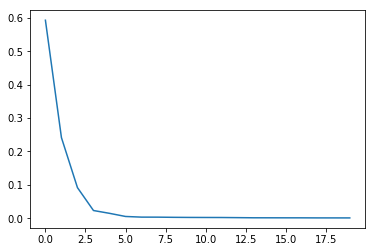

In [2]:
import matplotlib.pyplot as plt
# 特征值大小的分布图
x = range(20)
plt.plot(x, percen[:20])
plt.show()

In [3]:
# 前40大特征值累计的和
np.cumsum(percen)[:40]

array([0.59254058, 0.83377877, 0.9252789 , 0.94828469, 0.96287661,
       0.96806479, 0.97129137, 0.97443814, 0.97706893, 0.979382  ,
       0.98155734, 0.98363016, 0.985321  , 0.98657691, 0.98778044,
       0.98892136, 0.99003252, 0.9909571 , 0.99186213, 0.99272358,
       0.99346245, 0.9941864 , 0.99484841, 0.99542112, 0.99597946,
       0.99648382, 0.99697404, 0.997435  , 0.99782913, 0.9981968 ,
       0.99849341, 0.99865661, 0.99881645, 0.99893773, 0.99905403,
       0.99915929, 0.99925188, 0.99933205, 0.99939131, 0.99944629])